In [1]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from datetime import datetime

In [2]:
# Importing dataset
url="./Ruter_data.csv"
df = pd.read_csv(url, sep=';')
df.head(1)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5


In [3]:
# Feature 1
# Add a column to display how full the buses are in percent.

# First, remove outliers where Passasjerer_Ombord < 0
df.drop(df[df['Passasjerer_Ombord'] < 0].index, inplace=True)


In [4]:
# Then add new column (Passasjerer_Ombord / Kjøretøy_Kapasitet)

df['Passenger_Fill_Percent'] = round((df.Passasjerer_Ombord / df.Kjøretøy_Kapasitet), 2)

df.head(1)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passenger_Fill_Percent
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,0.04


In [5]:
# Group into percentage groups
conditions = [
    (df['Passenger_Fill_Percent'] < 0.1),
    (df['Passenger_Fill_Percent'] >= 0.1) & (df['Passenger_Fill_Percent'] < 0.2),
    (df['Passenger_Fill_Percent'] >= 0.2) & (df['Passenger_Fill_Percent'] < 0.3),
    (df['Passenger_Fill_Percent'] >= 0.3) & (df['Passenger_Fill_Percent'] < 0.4),
    (df['Passenger_Fill_Percent'] >= 0.4) & (df['Passenger_Fill_Percent'] < 0.5),
    (df['Passenger_Fill_Percent'] >= 0.5) & (df['Passenger_Fill_Percent'] < 0.6),
    (df['Passenger_Fill_Percent'] >= 0.6) & (df['Passenger_Fill_Percent'] < 0.7),
    (df['Passenger_Fill_Percent'] >= 0.7) & (df['Passenger_Fill_Percent'] < 0.8),
    (df['Passenger_Fill_Percent'] >= 0.8) & (df['Passenger_Fill_Percent'] < 0.9),
    (df['Passenger_Fill_Percent'] >= 0.9)
    ]

group_values = [
    '0-10%',
    '10-20%',
    '20-30%',
    '30-40%',
    '40-50%',
    '50-60%',
    '60-70%',
    '70-80%',
    '80-90%',
    '90-100%',
    ]

df['Passenger_Fill_Percent_Group'] = np.select(conditions, group_values)

df.head(1)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passenger_Fill_Percent,Passenger_Fill_Percent_Group
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,0.04,0-10%


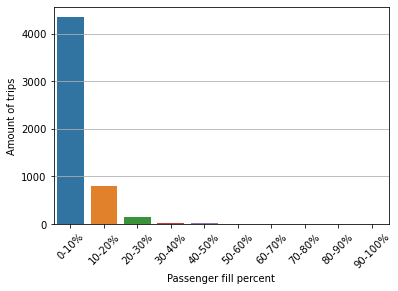

In [6]:
# Plot fill percent group as bar chart

sns.countplot(x='Passenger_Fill_Percent_Group', data=df, order=group_values);
plt.rcParams.update({'font.size': 9})
plt.xticks(rotation=45);
plt.xlabel(xlabel='Passenger fill percent')
plt.ylabel(ylabel='Amount of trips')
plt.grid(b=True, which='major', axis='y')

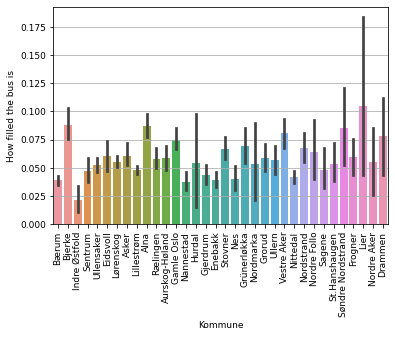

In [7]:
# Feature 2
# Average fill percent for each Kommune

sns.barplot(x='Kommune', y='Passenger_Fill_Percent', data=df);

plt.rcParams.update({'font.size': 9})
plt.xticks(rotation=90);
plt.ylabel(ylabel='How filled the bus is')
plt.grid(b=True, which='major', axis='y')

# Cant figure out how to show it in percent instead of decimal numbers

In [8]:
# Feature 3
# Show what kommuner has the most delayed arrivals

# Firstly we need to remove illegal times using regex

regex='^(?:(?:([01]?\d|2[0-3]):)?([0-5]?\d):)?([0-5]?\d)$'

filter = df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].str.contains(regex)
df = df[filter]

filter = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].str.contains(regex)
df = df[filter]
df.head(1)

/var/folders/bt/w223rqtn4z35ks_jg237mz_m0000gn/T/ipykernel_23072/4217302711.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  filter = df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].str.contains(regex)
/var/folders/bt/w223rqtn4z35ks_jg237mz_m0000gn/T/ipykernel_23072/4217302711.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  filter = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].str.contains(regex)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passenger_Fill_Percent,Passenger_Fill_Percent_Group
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,0.04,0-10%


In [9]:
# Display how many seconds later or before planned the bus arrives like this:

def calculateDelta(plannedArrivalRaw, actualArrivalRaw):
    try:
        plannedArrival = datetime.strptime(plannedArrivalRaw, '%H:%M:%S')
        plannedArrivalSeconds = plannedArrival.second + plannedArrival.minute*60 + plannedArrival.hour*3600

        actualArrival = datetime.strptime(actualArrivalRaw, '%H:%M:%S')
        actualArrivalSeconds = actualArrival.second + actualArrival.minute*60 + actualArrival.hour*3600

        deltatime = actualArrivalSeconds - plannedArrivalSeconds

    except:
        # print("An exception occurred")
        deltatime = np.nan
    
    return deltatime

print(calculateDelta('10:10:10', '11:11:11'))

10:10:10 11:11:11
3661


In [10]:
# Wrap the funtion to take rows instead of times

def row_calculateDelta(row):
    try:
        plannedArrivalRaw = row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']
        plannedArrival = datetime.strptime(plannedArrivalRaw, '%H:%M:%S')
        plannedArrivalSeconds = plannedArrival.second + plannedArrival.minute*60 + plannedArrival.hour*3600

        actualArrivalRaw = row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']
        actualArrival = datetime.strptime(actualArrivalRaw, '%H:%M:%S')
        actualArrivalSeconds = actualArrival.second + actualArrival.minute*60 + actualArrival.hour*3600

        deltatime = actualArrivalSeconds - plannedArrivalSeconds

    except:
        # print("An exception occurred")
        deltatime = np.nan
    
    return deltatime


In [11]:
# Apply the function to each row
df['Delta_Arrival'] = df.apply(lambda row: row_calculateDelta(row), axis=1)
df.head(1)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passenger_Fill_Percent,Passenger_Fill_Percent_Group,Delta_Arrival
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,0.04,0-10%,53


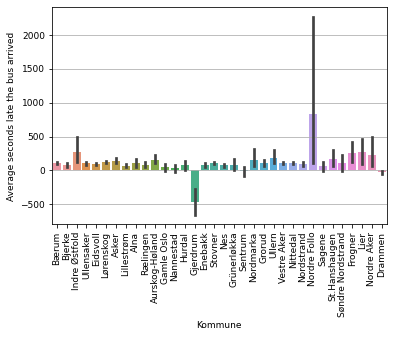

In [12]:
sns.barplot(x='Kommune', y='Delta_Arrival', data=df);

plt.rcParams.update({'font.size': 9})
plt.xticks(rotation=90);
plt.ylabel(ylabel='Average seconds late the bus arrived')
plt.grid(b=True, which='major', axis='y')

In [13]:
# Feature 4
# Feature Engineering

# Show delay based on which hour of the day it is(rush, night, etc.)

# We need to add a column with the planned arrival-hour.

# Function to get the hour:

def row_getArrivalHour(row):
    try:
        plannedArrivalRaw = row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']
        plannedArrival = datetime.strptime(plannedArrivalRaw, '%H:%M:%S')
        plannedArrivalHour = plannedArrival.hour

    except:
        deltatime = np.nan
    
    return plannedArrivalHour

        

# We can use this function on each row

df['Planned_Arrival_Hour'] = df.apply(lambda row: row_getArrivalHour(row), axis=1)
df.head(1)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passenger_Fill_Percent,Passenger_Fill_Percent_Group,Delta_Arrival,Planned_Arrival_Hour
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:53,10:53:59,10:53:00,10:53:00,112,5,0.04,0-10%,53,10


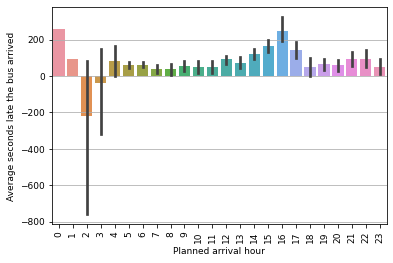

In [14]:
# Plot it in a graph
sns.barplot(x='Planned_Arrival_Hour', y='Delta_Arrival', data=df);

plt.rcParams.update({'font.size': 9})
plt.xticks(rotation=90);
plt.xlabel(xlabel='Planned arrival hour')
plt.ylabel(ylabel='Average seconds late the bus arrived')
plt.grid(b=True, which='major', axis='y')

In [15]:
# Feature 5

# Show how late the buses are based on what weekday it is

# First we need to extract the weekday into a seperate column


def row_getWeekday(row):
    try:
        dateRaw = row['Dato']
        date = datetime.strptime(dateRaw, '%d/%m/%Y')
        weekday = date.strftime('%A')

    except:
        weekday = np.nan
    
    return weekday

# We can use this function on each row

df['Weekday'] = df.apply(lambda row: row_getWeekday(row), axis=1)
df.head(1)


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Passenger_Fill_Percent,Passenger_Fill_Percent_Group,Delta_Arrival,Planned_Arrival_Hour,Weekday
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:59,10:53:00,10:53:00,112,5,0.04,0-10%,53,10,Monday


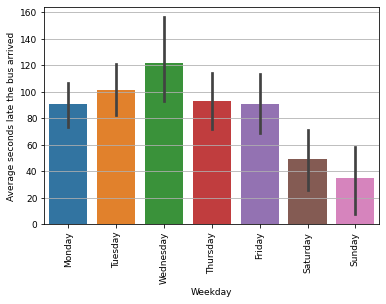

In [16]:
# Plot it in a graph

weekday_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday',
]

sns.barplot(x='Weekday', y='Delta_Arrival', data=df, order=weekday_order);

plt.rcParams.update({'font.size': 9})
plt.xticks(rotation=90);
plt.xlabel(xlabel='Weekday')
plt.ylabel(ylabel='Average seconds late the bus arrived')
plt.grid(b=True, which='major', axis='y')